In [ ]:
import pandas as pd
import zipfile
import numpy as np

#### Abaixo estamos pegando o Data Frame do Campeoanto Brasileiro de 2016, que está disponível no site [football-data-co-uk](https://www.football-data.co.uk/). Nele temos todas as partidas que ocorreram no campeonato, o resultado, e as ODDS para casa respectivo jogo. Iremos acrescentar ao Data Frame informações disponibilizadas no [transfermarket](https://www.transfermarkt.com.br/) sobre o valor dos times antes da janela de tranferência (01/09) e depois dela. Além disso, pegamos a posição de cada time no ranking feito pela [CBF](https://www.cbf.com.br/) de melhores times no Brasil nesse período, e adicionamos ao nosso Data Frame

In [ ]:
df1 = pd.read_csv('/content/data_2016.csv')

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y/%m/%d')

data_referencia = pd.to_datetime('2016-09-01')

valores_antes = {
    'Flamengo RJ': 57450000, 'Corinthians': 64550000, 'Sao Paulo': 78500000, 'Coritiba': 23400000,
    'Atletico-MG': 65050000, 'Atletico-PR': 43930000, 'Chapecoense-SC': 21250000, 'Santa Cruz': 24250000,
    'Vitoria': 23350000, 'America MG': 12400000, 'Gremio': 59600000, 'Internacional': 58300000,
    'Palmeiras': 72050000, 'Santos': 54280000, 'Fluminense': 57750000, 'Sport Recife': 30550000,
    'Figueirense': 14950000, 'Ponte Preta': 25900000, 'Botafogo RJ': 25980000, 'Cruzeiro': 71700000
}

valores_depois = {
    'Flamengo RJ': 58500000, 'Corinthians': 46700000, 'Sao Paulo': 65730000, 'Coritiba': 26630000,
    'Atletico-MG': 71100000, 'Atletico-PR': 34700000, 'Chapecoense-SC': 26150000, 'Santa Cruz': 20950000,
    'Vitoria': 24080000, 'America MG': 22480000, 'Gremio': 64150000, 'Internacional': 63330000,
    'Palmeiras': 78850000, 'Santos': 41530000, 'Fluminense': 50380000, 'Sport Recife': 36150000,
    'Figueirense': 26580000, 'Ponte Preta': 28000000, 'Botafogo RJ': 26950000, 'Cruzeiro': 74450000
}

def atribuir_valores(row, coluna):
    time = row[coluna]
    if time in valores_antes and row['Date'] < data_referencia:
        return valores_antes[time]
    elif time in valores_depois and row['Date'] > data_referencia:
        return valores_depois[time]
    else:
        return None

df1['VH'] = df1.apply(lambda row: atribuir_valores(row, 'Home'), axis=1)
df1['VA'] = df1.apply(lambda row: atribuir_valores(row, 'Away'), axis=1)


In [ ]:
# Criação do dicionário de mapeamento para o ano de 2016
rank_mapping_2016 = {
    'Flamengo RJ': 6,
    'Corinthians': 1,
    'Sao Paulo': 5,
    'Cruzeiro': 3,
    'Atletico-MG': 7,
    'Atletico-PR': 12,
    'America MG': 31,
    'Botafogo RJ': 13,
    'Chapecoense-SC': 24,
    'Vitoria': 20,
    'Gremio': 2,
    'Sport Recife': 19,
    'Palmeiras': 8,
    'Santos': 4,
    'Fluminense': 10,
    'Figueirense': 16,
    'Internacional': 9,
    'Ponte Preta': 17,
    'Coritiba': 14,
    'Santa Cruz': 35
}

# Aplicação do mapeamento para atribuir os ranks
df1['Rank_Home'] = df1['Home'].map(rank_mapping_2016)
df1['Rank_Away'] = df1['Away'].map(rank_mapping_2016)


In [ ]:
df1

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,VH,VA,Rank_Home,Rank_Away
0,Brazil,Serie A,2016,2016-05-14,20:00,Flamengo RJ,Sport Recife,1,0,H,...,1.70,4.15,6.80,1.58,3.80,5.70,57450000,30550000,6,19
1,Brazil,Serie A,2016,2016-05-14,20:00,Palmeiras,Atletico-PR,4,0,H,...,1.81,3.80,5.75,1.74,3.52,4.72,72050000,43930000,8,12
2,Brazil,Serie A,2016,2016-05-14,22:30,Atletico-MG,Santos,1,0,H,...,3.17,3.25,2.65,2.84,3.14,2.47,65050000,54280000,7,4
3,Brazil,Serie A,2016,2016-05-15,01:00,Coritiba,Cruzeiro,1,0,H,...,3.00,3.40,2.91,2.69,3.09,2.66,23400000,71700000,14,3
4,Brazil,Serie A,2016,2016-05-15,15:00,Botafogo RJ,Sao Paulo,0,1,A,...,1.98,3.75,4.75,1.90,3.30,4.11,25980000,78500000,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Brazil,Serie A,2016,2016-12-11,19:00,Ponte Preta,Coritiba,2,0,H,...,1.76,4.10,5.76,1.63,3.78,5.22,28000000,26630000,17,14
375,Brazil,Serie A,2016,2016-12-11,19:00,Santos,America MG,1,0,H,...,1.21,7.39,19.31,1.19,6.42,14.32,41530000,22480000,4,31
376,Brazil,Serie A,2016,2016-12-11,19:00,Sao Paulo,Santa Cruz,5,0,H,...,1.33,6.70,12.00,1.26,5.77,10.12,65730000,20950000,5,35
377,Brazil,Serie A,2016,2016-12-11,19:00,Sport Recife,Figueirense,2,0,H,...,1.30,6.36,15.86,1.24,5.55,11.75,36150000,26580000,19,16


#### Abaixo estamos pegando outro Data Frame, mais especificamente do site [transfermarket](https://www.transfermarkt.com.br/), que contém um dado desejado, que seria a posição de cada time por rodada no Campeonato Brasileiro de 2016. Como no Data Frame do transfermarket existem várias colunas que não não desejadas, iremos, primeiramente, pegar o ano desejado, que é 2016, e pegar apenas 5 colunas, as 3 primeiras serão apenas para comparar com meu data frame, e achar as partidas correspondentes, para adicionar as 2 colunas desejedas, que seriam a posição de cada time por rodada. Basta usar um merge para juntar os dois Data Frames, e teremos as informações julgadas como importantes.


In [ ]:
!pip install basedosdados

import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='mundo_transfermarkt_competicoes',
table_id='brasileirao_serie_a',
billing_project_id="trabalho-final-ia")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.2/135.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Downloading: 100%|██████████| 7030/7030 [00:03<00:00, 2316.77rows/s]


In [ ]:
# Exibir as primeiras linhas do DataFrame resultante
df2 = df.loc[df['ano_campeonato'] == 2016]

In [ ]:
# Selecionar apenas as colunas desejadas
df2 = df2[[ 'data',  'time_man', 'time_vis',  'colocacao_man', 'colocacao_vis']]
df2['time_man'].unique()

array(['Flamengo', 'Palmeiras', 'Atlético-MG', 'Coritiba FC', 'Botafogo',
       'Santa Cruz', 'Corinthians', 'Figueirense FC', 'América-MG',
       'Internacional', 'Ponte Preta', 'Fluminense', 'Cruzeiro',
       'Santos FC', 'Atlético-PR', 'EC Vitória', 'São Paulo', 'Grêmio',
       'Chapecoense', 'Sport Recife'], dtype=object)

In [ ]:
# Os Data Frames por mais que possuem a mesma estrutura (cada linha é uma partida), os nomes estão escritos de maneiras distintas
# então iremos mudar o nome dos times do primeiro Data Frame para corresponder com o segundo Data Frame
team_name_mapping = {
    'Sport Recife': 'Sport Recife',
    'Atletico-PR': 'Atlético-PR',
    'Santos': 'Santos FC',
    'Cruzeiro': 'Cruzeiro',
    'Sao Paulo': 'São Paulo',
    'Vitoria': 'EC Vitória',
    'Fluminense': 'Fluminense',
    'Gremio': 'Grêmio',
    'Ponte Preta': 'Ponte Preta',
    'Chapecoense-SC': 'Chapecoense',
    'Palmeiras': 'Palmeiras',
    'Santa Cruz': 'Santa Cruz',
    'Figueirense': 'Figueirense FC',
    'Atletico-MG': 'Atlético-MG',
    'Coritiba': 'Coritiba FC',
    'America MG': 'América-MG',
    'Flamengo RJ': 'Flamengo',
    'Internacional': 'Internacional',
    'Corinthians': 'Corinthians',
    'Botafogo RJ': 'Botafogo'
}

# Substituição dos nomes dos times no dataframe
df1['Home'].replace(team_name_mapping, inplace=True)
df1['Away'].replace(team_name_mapping, inplace=True)


In [ ]:
# As colunas 'colocacao_man', 'colocacao_vis' agora são adicionadas ao df.
df = pd.merge(df1, df2, how='left', left_on=['Home', 'Away'], right_on=[ 'time_man', 'time_vis'])

# Iremos dar drop nas informações 'adicionais' que vieram junto
df.drop(columns=['data', 'time_man', 'time_vis'], inplace=True)

In [ ]:
# Verificar se ficou correto a junção dos data frames
df

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,MaxA,AvgH,AvgD,AvgA,VH,VA,Rank_Home,Rank_Away,colocacao_man,colocacao_vis
0,Brazil,Serie A,2016,2016-05-14,20:00,Flamengo,Sport Recife,1,0,H,...,6.80,1.58,3.80,5.70,57450000,30550000,6,19,5,18
1,Brazil,Serie A,2016,2016-05-14,20:00,Palmeiras,Atlético-PR,4,0,H,...,5.75,1.74,3.52,4.72,72050000,43930000,8,12,1,20
2,Brazil,Serie A,2016,2016-05-14,22:30,Atlético-MG,Santos FC,1,0,H,...,2.65,2.84,3.14,2.47,65050000,54280000,7,4,3,14
3,Brazil,Serie A,2016,2016-05-15,01:00,Coritiba FC,Cruzeiro,1,0,H,...,2.91,2.69,3.09,2.66,23400000,71700000,14,3,6,16
4,Brazil,Serie A,2016,2016-05-15,15:00,Botafogo,São Paulo,0,1,A,...,4.75,1.90,3.30,4.11,25980000,78500000,13,5,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Brazil,Serie A,2016,2016-12-11,19:00,Ponte Preta,Coritiba FC,2,0,H,...,5.76,1.63,3.78,5.22,28000000,26630000,17,14,10,14
375,Brazil,Serie A,2016,2016-12-11,19:00,Santos FC,América-MG,1,0,H,...,19.31,1.19,6.42,14.32,41530000,22480000,4,31,3,20
376,Brazil,Serie A,2016,2016-12-11,19:00,São Paulo,Santa Cruz,5,0,H,...,12.00,1.26,5.77,10.12,65730000,20950000,5,35,11,19
377,Brazil,Serie A,2016,2016-12-11,19:00,Sport Recife,Figueirense FC,2,0,H,...,15.86,1.24,5.55,11.75,36150000,26580000,19,16,16,18


In [ ]:
# Verificar os valores NaN em todo o DataFrame, para ver se tem algum dado faltante
print(df.isna().sum())


Country          0
League           0
Season           0
Date             0
Time             0
Home             0
Away             0
HG               0
AG               0
Res              0
PH               0
PD               0
PA               0
MaxH             0
MaxD             0
MaxA             0
AvgH             0
AvgD             0
AvgA             0
VH               0
VA               0
Rank_Home        0
Rank_Away        0
colocacao_man    0
colocacao_vis    0
dtype: int64


In [ ]:
# Iremos criar uma nova coluna chamada "Rodada", que muda a cada 10 partidas
df['Rodada'] = df.index // 10 + 1

# Iremos retirar as colunas abaixo (como previamente a uma partida não se tem informação da quantidade de gols,
# então iremos desconsiderar esse fator)
df.drop(['Season','Country', 'League', 'HG', 'AG'], axis=1, inplace=True)

# Iremos apenas deixar a coluna de rodadas na frente para melhorar a visualização
cols = ['Rodada'] + [col for col in df if col != 'Rodada']
df = df[cols]


In [ ]:
# Supondo que suas colunas de features e target estejam separadas
df['colocacao_man'] = df['colocacao_man'].astype('int64')
df['colocacao_vis'] = df['colocacao_vis'].astype('int64')


#### Abaixo iremos adicionar 4 novas colunas. No Data Frame não está sendo considerado um fator julgado como importante que seria o "momento" do time. Para considerar isso, foi pensado em analisar as últimas X partidas disputadas e ver a quantidade de pontos convertidos nas X últimas partidas. Basicamente está sendo analisado a porcentagem de pontos feitos nas últimas partidas ((pontos convertidos/pontos totais) considerando as últimas X partidas). Então nas primerias 2 colunas, está considerando a porcentagem de partidas do time Home e Away, analisando todas as partidas, independente de estar jogando dentro ou fora de casa. Já nas outras 2 colunas, está sendo considerado a porcentagem de pontos convertidos do time Home jogando as X últimas partidas como mandante, e na outra a porcentagem de pontos convertidos do time Away jogando as últimas X partidas como visitante. Porém, para as primeiras X partidas, como não tem informação do histórico, foi colocado um valor padrão de 50%.

In [ ]:
# Lógica para colocar as 2 colunas das partidas gerais

# Supondo que 'df' seja o seu DataFrame
X = 5
df['Date'] = pd.to_datetime(df['Date'])  # Certificar-se de que a data está no formato correto

# Vamos mapear os resultados para pontos
result_points_mapping = {'H': [3, 0], 'D': [1, 1], 'A': [0, 3]}
df[['Home_points', 'Away_points']] = df['Res'].apply(lambda res: pd.Series(result_points_mapping[res]))

# Criamos DataFrames separados para Home e Away
df_home = df[['Date', 'Home', 'Home_points']].rename(columns={'Home': 'Team', 'Home_points': 'Points'})
df_away = df[['Date', 'Away', 'Away_points']].rename(columns={'Away': 'Team', 'Away_points': 'Points'})

# Concatenamos e ordenamos por time e data
df_points = pd.concat([df_home, df_away]).sort_values(['Team', 'Date'])

# Calculamos a média dos últimos X jogos
df_points['Last_X_Pts_Ratio'] = df_points.groupby('Team')['Points'].rolling(X, min_periods=1).sum().reset_index(0,drop=True) / (3*X)

# Então, atribuímos 50% para as primeiras X partidas
df_points['Last_X_Pts_Ratio'] = df_points.groupby('Team')['Last_X_Pts_Ratio'].apply(lambda x: x.shift().fillna(0.5))

# Finalmente, unimos de volta ao DataFrame original
df_points = df_points[['Date', 'Team', 'Last_X_Pts_Ratio']]

# Na operação de união, inclua apenas as colunas necessárias
df = df.merge(df_points, how='left', left_on=['Date', 'Home'], right_on=['Date', 'Team']).rename(columns={'Last_X_Pts_Ratio': 'Last_X_Pts_Ratio_Home'})
df = df.merge(df_points, how='left', left_on=['Date', 'Away'], right_on=['Date', 'Team']).rename(columns={'Last_X_Pts_Ratio': 'Last_X_Pts_Ratio_Away'})


In [ ]:
# Para o time da casa
df_home = df[['Date', 'Home', 'Home_points']].copy()
df_home['Last_X_Home_Pts_Ratio'] = df_home.groupby('Home')['Home_points'].rolling(X, min_periods=1).sum().reset_index(0,drop=True) / (3*X)
df_home['Last_X_Home_Pts_Ratio'] = df_home.groupby('Home')['Last_X_Home_Pts_Ratio'].apply(lambda x: x.shift().fillna(0.5))
df_home = df_home[['Date', 'Home', 'Last_X_Home_Pts_Ratio']]
# Na operação de união, inclua apenas as colunas necessárias
df = df.merge(df_home, how='left', on=['Date', 'Home'])

# Para o time visitante
df_away = df[['Date', 'Away', 'Away_points']].copy()
df_away['Last_X_Away_Pts_Ratio'] = df_away.groupby('Away')['Away_points'].rolling(X, min_periods=1).sum().reset_index(0,drop=True) / (3*X)
df_away['Last_X_Away_Pts_Ratio'] = df_away.groupby('Away')['Last_X_Away_Pts_Ratio'].apply(lambda x: x.shift().fillna(0.5))
df_away = df_away[['Date', 'Away', 'Last_X_Away_Pts_Ratio']]

# Na operação de união, inclua apenas as colunas necessárias
df = df.merge(df_away, how='left', on=['Date', 'Away'])


In [ ]:
# Analisar para ver se todos os dados foram preenchidos corretamente
print(df.columns)
df.drop(['Home_points','Away_points', 'Team_x', 'Team_y'], axis=1, inplace=True)

Index(['Rodada', 'Date', 'Time', 'Home', 'Away', 'Res', 'PH', 'PD', 'PA',
       'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'VH', 'VA', 'Rank_Home',
       'Rank_Away', 'colocacao_man', 'colocacao_vis', 'Home_points',
       'Away_points', 'Team_x', 'Last_X_Pts_Ratio_Home', 'Team_y',
       'Last_X_Pts_Ratio_Away', 'Last_X_Home_Pts_Ratio',
       'Last_X_Away_Pts_Ratio'],
      dtype='object')


In [ ]:
# Configurando 'Date' como índice
df.set_index('Date', inplace=True)

# Ordenando o DataFrame por data
df.sort_index(inplace=True)


In [ ]:
df.columns

Index(['Rodada', 'Time', 'Home', 'Away', 'Res', 'PH', 'PD', 'PA', 'MaxH',
       'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'VH', 'VA', 'Rank_Home',
       'Rank_Away', 'colocacao_man', 'colocacao_vis', 'Last_X_Pts_Ratio_Home',
       'Last_X_Pts_Ratio_Away', 'Last_X_Home_Pts_Ratio',
       'Last_X_Away_Pts_Ratio'],
      dtype='object')

#### Abaixo estamos separando o Data Frame geral, que temos cada linha sendo uma partida com todos os times, em Data Frames inidividuais, sendo cada Data Frame um time em específico. Então separamos o Data Frame de 380 linhas com 20 times, em 20 Data Frames, cada um com 38 linhas, que são as 38 partidas disputadas por cada equipe através do campeonato

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Res_encoded'] = encoder.fit_transform(df['Res'])

# Criar uma lista única de todos os times presentes no DataFrame
all_teams = pd.unique(df['Home'].values.ravel())

# Criar um dicionário para armazenar os DataFrames de cada time
team_dfs = {}

# Iterar sobre cada time e criar um DataFrame separado para cada um
for team in all_teams:
    # Selecionar as partidas em que o time é o mandante ou visitante
    team_games = df[(df['Home'] == team) | (df['Away'] == team)]

    # Armazenar o DataFrame do time no dicionário
    team_dfs[team] = team_games


In [ ]:
"""
Como estaremos tratando problemas de séries temporais então é necessário
ordenar por tempo, então primeiramente iremos ordenar todos os data frames
por data
"""
for team in all_teams:
    team_dfs[team] = team_dfs[team].sort_values('Date')


Este é um código para treinar um modelo usando PyTorch. O processo de treinamento é dividido em várias épocas, que são iterações completas através do conjunto de treinamento.

Dentro de cada época, os dados são processados em lotes para otimizar o uso de memória e acelerar o treinamento. Cada lote é processado da seguinte forma:

Primeiro, uma janela dos dados é selecionada e os recursos são extraídos e transformados em tensores do PyTorch.
O modelo é então usado para fazer previsões nos recursos da janela.
As previsões do modelo são processadas com a função softmax para calcular as probabilidades para cada classe.
A entropia dessas probabilidades é então calculada. A entropia é uma medida de incerteza. Quanto maior a entropia, mais incerta é a previsão.
Se a entropia for maior do que um limite pré-determinado (neste caso, 0,5), a perda é calculada para essas previsões e os gradientes são retropropagados através da rede. Isso significa que o modelo é treinado apenas em amostras onde está incerto em suas previsões.
O otimizador é então usado para atualizar os pesos do modelo.
O modelo é então avaliado em um conjunto de teste. O desempenho é avaliado calculando a perda nos dados de teste e a acurácia balanceada, que é uma métrica que leva em conta o desbalanceamento do conjunto de dados.

Finalmente, o modelo com a melhor acurácia balanceada é salvo. Isso permite que você retome o treinamento de onde parou ou use o melhor modelo para fazer previsões posteriormente.

Também há um critério de parada antecipada implementado para parar o treinamento se a perda de validação não melhorar após um determinado número de épocas. Isso pode ajudar a prevenir o sobreajuste.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Definindo os conjuntos de treino e teste com 70% para treino e 30% para teste
train_df1, test_df1 = train_test_split(df, test_size=0.3, random_state=42)

# Imprime o número de linhas em cada DataFrame
print("Number of rows in train_df: ", train_df1.shape[0])
print("Number of rows in test_df: ", test_df1.shape[0])
# Imprime o número de linhas presentes nos dataframes de treinamento e teste.


Number of rows in train_df:  265
Number of rows in test_df:  114


In [ ]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.nn.functional as F

# Definindo a estrutura do modelo
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(57, 128)  # Primeira camada totalmente conectada
        self.dropout1 = nn.Dropout(0.4)  # Dropout após a primeira camada com taxa de desligamento de 50%
        self.fc2 = nn.Linear(128, 64)  # Segunda camada totalmente conectada
        self.dropout2 = nn.Dropout(0.4)  # Dropout após a segunda camada com taxa de desligamento de 50%
        self.fc3 = nn.Linear(64, 3)  # Terceira camada totalmente conectada

    def forward(self, x):
        x = x.reshape(-1, 57)  # Redimensionando a entrada
        x = torch.tanh(self.fc1(x))  # Passando a entrada pela primeira camada e aplicando a função de ativação tanh
        x = self.dropout1(x)  # Aplicação do dropout após a primeira camada
        x = torch.tanh(self.fc2(x))  # Passando a saída da primeira camada pela segunda camada e aplicando a função de ativação tanh
        x = self.dropout2(x)  # Aplicação do dropout após a segunda camada
        x = self.fc3(x)  # Passando a saída da segunda camada pela terceira camada
        return x

In [ ]:
# Lista das colunas de características e da coluna alvo
feature_columns = ['PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'VH', 'VA', 'Rank_Home', 'Rank_Away', 'colocacao_man', 'colocacao_vis', 'Last_X_Pts_Ratio_Home', 'Last_X_Pts_Ratio_Away', 'Last_X_Home_Pts_Ratio', 'Last_X_Away_Pts_Ratio']
target_column = 'Res_encoded'

# Pesos de cada classe para lidar com o desequilíbrio de classes
weights = torch.tensor([1.25, 1.25, 0.6])

# Inicializando o modelo MLP
model = MLP()
# Definindo a função de perda - a entropia cruzada é utilizada para problemas de classificação
loss_function = nn.CrossEntropyLoss(weight=weights)
# Definindo o otimizador - Adam é um algoritmo de otimização popular
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.1)

# Define o tamanho da janela
window_size = 3


In [ ]:
# Função para calcular a entropia
def entropy(x):
    return (torch.sum(x * torch.log2(x+0.00000000000001), dim=1))*-1

In [ ]:
import random
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

# Define uma semente para garantir a reprodutibilidade do código
randomseed = 42
torch.manual_seed(randomseed);
torch.cuda.manual_seed_all(randomseed);
random.seed(randomseed);
np.random.seed(randomseed)
torch.backends.cudnn.deterministic=True


# Cria um objeto StandardScaler para normalizar os dados
scaler = StandardScaler()

# Ajusta o normalizador aos dados de treinamento (calcula a média e o desvio padrão)
scaler.fit(train_df1[feature_columns])

# Usa o normalizador para transformar os dados de treinamento e validação
train_df1[feature_columns] = scaler.transform(train_df1[feature_columns])
test_df1[feature_columns] = scaler.transform(test_df1[feature_columns])

# Define o número de épocas
num_epochs = 100

# Inicia a paciência para o Early Stopping
patience = 0
patience_limit = 100  # Define um limite para a paciência

# Cria listas para armazenar as perdas de treinamento e validação
train_losses = []
val_losses = []

# Inicializa a melhor acurácia balanceada
best_bal_acc = 0

# Inicializa a melhor perda de validação
best_val_loss = float('inf')

# Define o tamanho do lote de treinamento e teste
train_batch_size = 32
test_batch_size = 16

In [ ]:
# Loop sobre o número de épocas
for epoch in range(num_epochs):
    # Parte de treinamento
    running_train_loss = 0.0
    for i in range(0, len(train_df1), train_batch_size):  # Iterando sobre o conjunto de treinamento em lotes
        for j in range(i, min(i + train_batch_size, len(train_df1)) - window_size):  # Iterando sobre cada lote

            # Aqui, criamos os lotes de treinamento usando o tamanho da janela definido
            train_batch = train_df1.iloc[j:j+window_size]
            train_features = torch.tensor(train_batch[feature_columns].values, dtype=torch.float)
            train_targets = torch.tensor(train_df1[target_column].iloc[j + window_size], dtype=torch.long).unsqueeze(0)

            # Obtém os outputs do modelo
            outputs = model(train_features)

            # Obtém as probabilidades aplicando softmax
            probs = torch.softmax(outputs, dim=1)

            # Calcula a entropia
            ent = entropy(probs)

            # Define um limite para a entropia
            entropy_threshold = 0.5

            # Seleciona apenas os outputs e targets onde a entropia é maior que o limite
            indices = torch.where(ent > entropy_threshold)
            high_entropy_outputs = outputs[indices]
            high_entropy_targets = train_targets[indices]

            # Zera os gradientes do otimizador
            optimizer.zero_grad()

            # Calcula a loss apenas para essas amostras
            loss = loss_function(high_entropy_outputs, high_entropy_targets)

            # Retropropagação do erro
            loss.backward()

            # Atualiza os parâmetros do modelo
            optimizer.step()

            # Adicione a perda atual ao running_train_loss
            running_train_loss += loss.item()

    # Adicione a perda média de treinamento à lista train_losses
    train_losses.append(running_train_loss / (len(train_df1) // 10))

    # Parte de teste
    all_predictions = []
    all_true_values = []
    running_val_loss = 0.0
    for i in range(0, len(test_df1), test_batch_size):  # Iterando sobre o conjunto de teste em lotes
        if i + test_batch_size < len(test_df1):  # Garantindo que não vamos além do tamanho do dataframe de teste
            for j in range(i + test_batch_size, min(i + 2 * test_batch_size, len(test_df1)) - window_size):  # Iterando sobre cada lote

                # Aqui, estamos usando o conjunto de teste
                test_batch = test_df1.iloc[j:j+window_size]
                test_features = torch.tensor(test_batch[feature_columns].values, dtype=torch.float)
                test_targets = torch.tensor(test_df1[target_column].iloc[j + window_size], dtype=torch.long).unsqueeze(0)

                with torch.no_grad():  # Não precisamos calcular gradientes durante a fase de teste
                    outputs = model(test_features)
                    loss = loss_function(outputs, test_targets)
                    _, predicted = torch.max(outputs.data, 1)

                # Adicione a perda atual ao running_val_loss
                running_val_loss += loss.item()

                all_predictions.extend(predicted.numpy())
                all_true_values.extend(test_targets.numpy())

    # Adicione a perda média de validação à lista val_losses
    val_loss = running_val_loss / len(test_df1)
    val_losses.append(val_loss)

    # Calcula a acurácia balanceada no conjunto de validação
    bal_acc = balanced_accuracy_score(all_true_values, all_predictions)

    # Verificando se a acurácia balanceada atual é a melhor
    if bal_acc > best_bal_acc:
        best_bal_acc = bal_acc
        # Salva o modelo com a maior acurácia balanceada
        torch.save(model.state_dict(), "best_model.pth")

    # Verificando se a perda de validação atual é a melhor
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        # Reset a paciência
        patience += 0
    else:
        patience += 1

    # Interrompe o treinamento se a paciência for maior que o limite de paciência
    if patience >= patience_limit:
        print("Early stopping at epoch: ", epoch)
        break

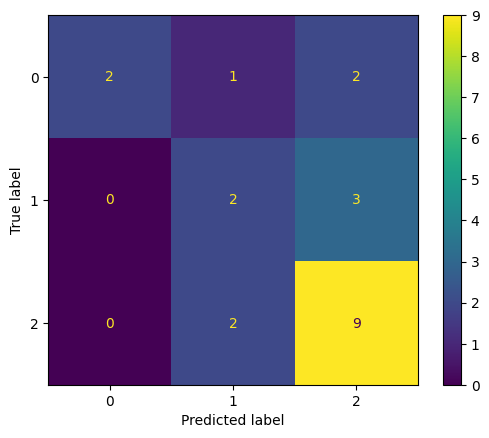

,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score
0,0.619048,0.539394,0.670068,0.619048,0.608435


In [ ]:
# Importa as bibliotecas necessárias para avaliar o modelo
import torch
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Carrega o melhor modelo salvo durante o treinamento
model = MLP()
model.load_state_dict(torch.load("best_model.pth"))
model.eval()  # Coloca o modelo no modo de avaliação

# Tamanho do lote de teste
test_batch_size = 16

all_predictions = []
all_true_values = []

# Faz previsões no conjunto de teste
for i in range(0, len(test_df1), test_batch_size):
    if i + 10 < len(test_df1):
        for j in range(i+10, min(i+test_batch_size, len(test_df1))-window_size):

            # Seleciona uma janela de exemplos de teste
            test_batch = test_df1.iloc[j:j+window_size]

            # Converte os exemplos para tensores do PyTorch
            test_features = torch.tensor(test_batch[feature_columns].values, dtype=torch.float)
            test_targets = torch.tensor(test_df1[target_column].iloc[j + window_size], dtype=torch.long).unsqueeze(0)

            # Faz previsões com o modelo
            with torch.no_grad():
                outputs = model(test_features)

            # Obtém as classes preditas
            _, predicted = torch.max(outputs.data, 1)

            # Adiciona as predições e os verdadeiros valores às listas correspondentes
            all_predictions.extend(predicted.numpy())
            all_true_values.extend(test_targets.numpy())

# Calcula as métricas do modelo
conf_matrix = confusion_matrix(y_true=all_true_values, y_pred=all_predictions, labels=[0, 1, 2])
accuracy = accuracy_score(all_true_values, all_predictions)
balanced_accuracy = balanced_accuracy_score(all_true_values, all_predictions)
precision = precision_score(all_true_values, all_predictions, average='weighted')
recall = recall_score(all_true_values, all_predictions, average='weighted')
f1 = f1_score(all_true_values, all_predictions, average='weighted')

# Cria um dataframe para exibir as métricas
metrics_df = pd.DataFrame({"Accuracy": [accuracy],
                           "Balanced Accuracy": [balanced_accuracy],
                           "Precision": [precision],
                           "Recall": [recall],
                           "F1 Score": [f1]})

# Plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Exibe o dataframe com as métricas
metrics_df

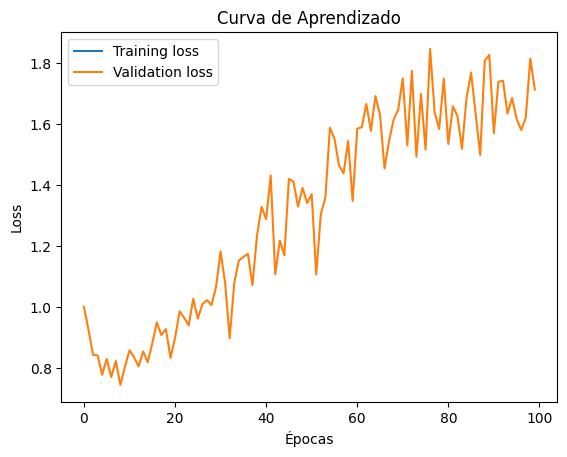

In [ ]:
# Exemplo de como plotar a curva de aprendizado
plt.figure()
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Curva de Aprendizado')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


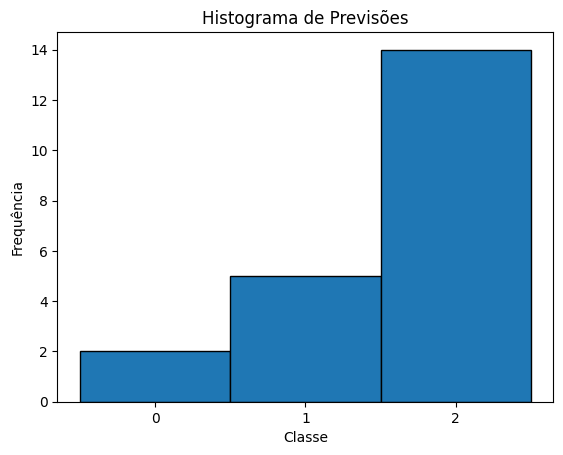

In [ ]:
# Exemplo de como plotar um histograma de previsões
plt.figure()
plt.hist(all_predictions, bins=np.arange(4) - 0.5, edgecolor='black')
plt.title('Histograma de Previsões')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks([0, 1, 2])
plt.show()


Processing team: Flamengo


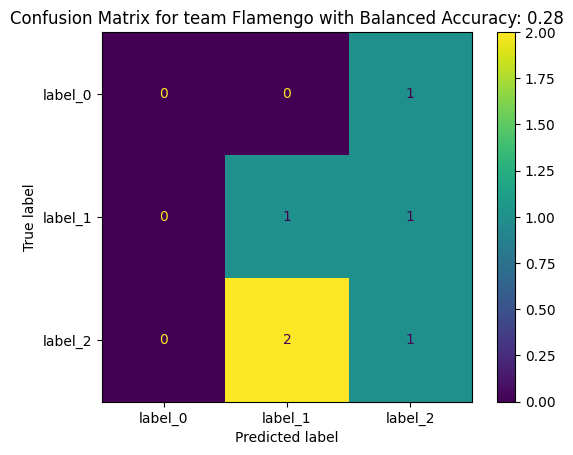

Processing team: Palmeiras


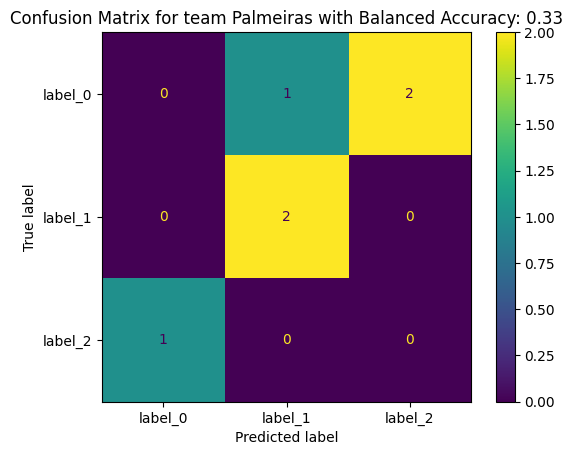

Processing team: Atlético-MG


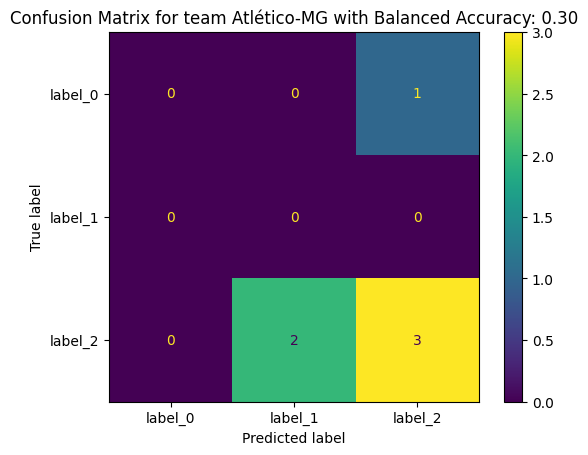

Processing team: Coritiba FC


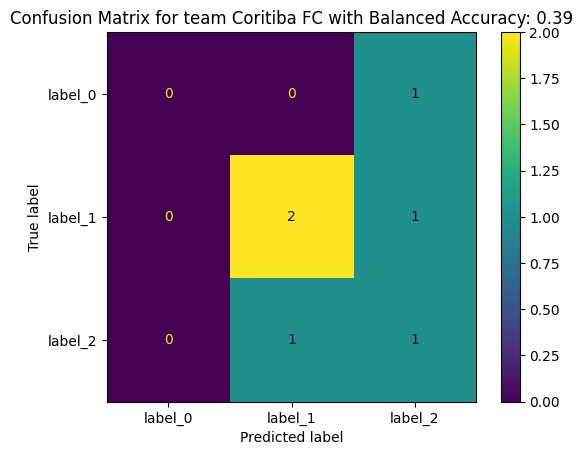

Processing team: Botafogo


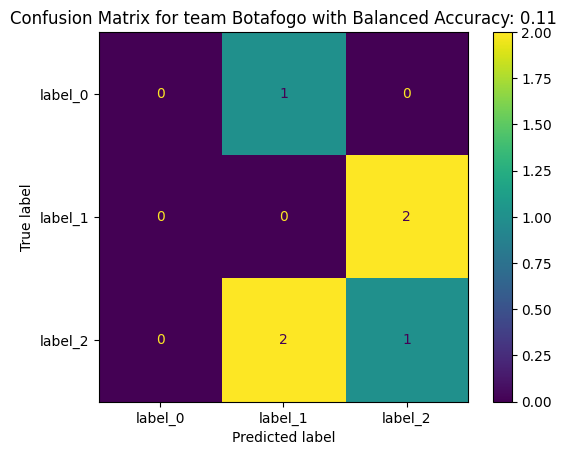

Processing team: Santa Cruz


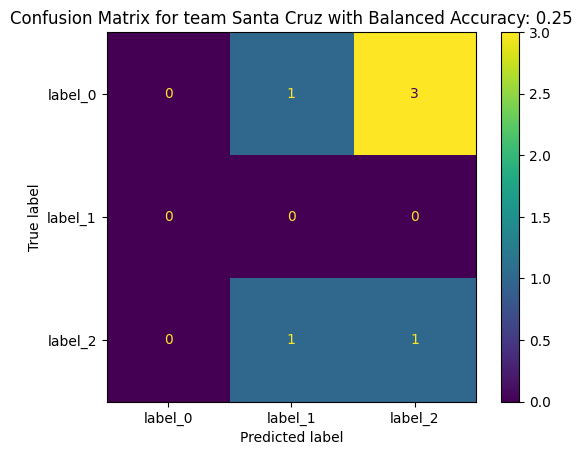

Processing team: América-MG


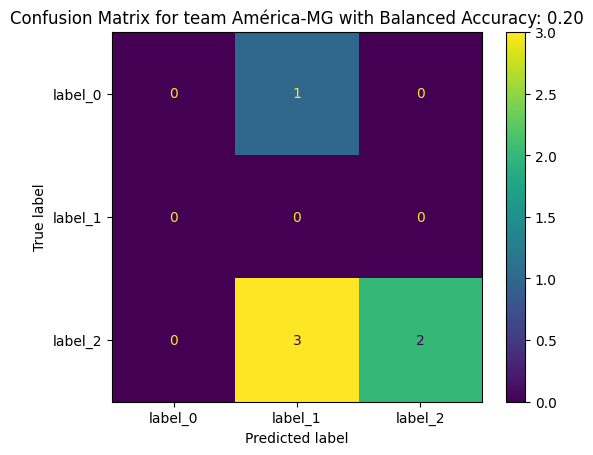

Processing team: Corinthians


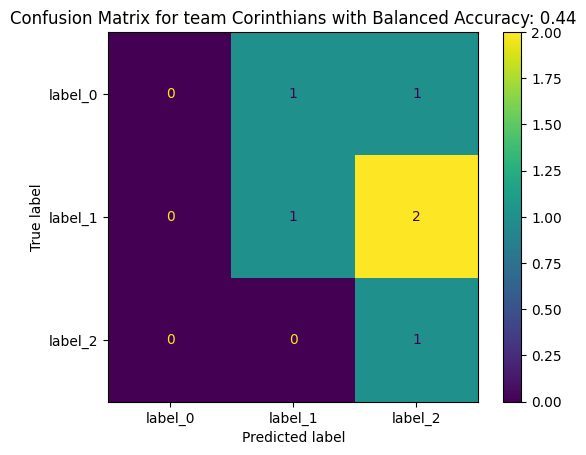

Processing team: Figueirense FC


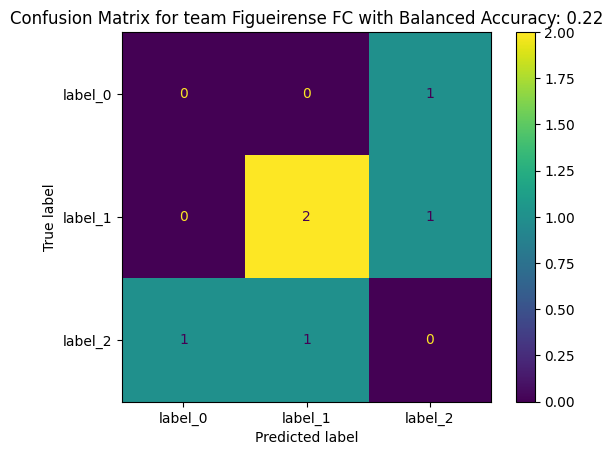

Processing team: Internacional


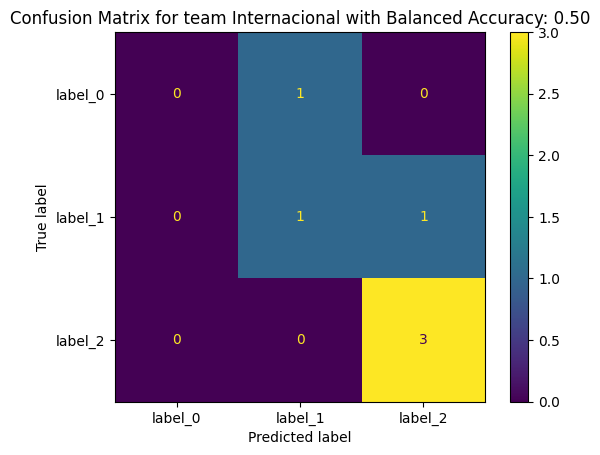

Processing team: Ponte Preta


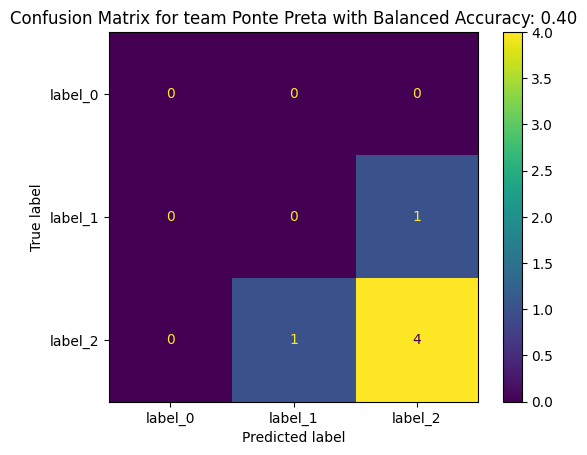

Processing team: Fluminense


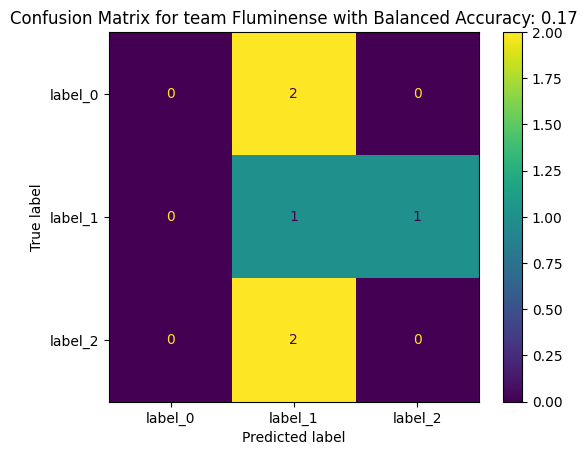

Processing team: Cruzeiro


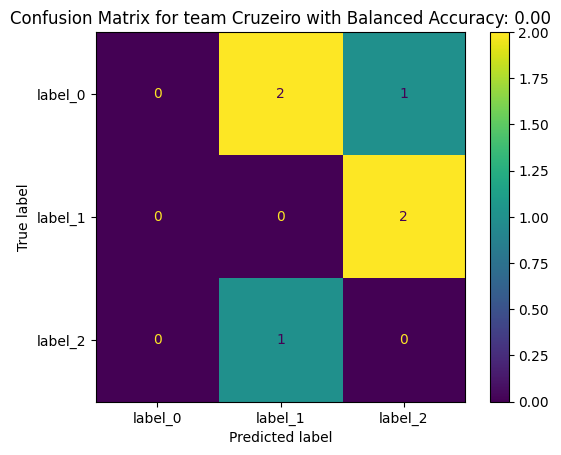

Processing team: Atlético-PR


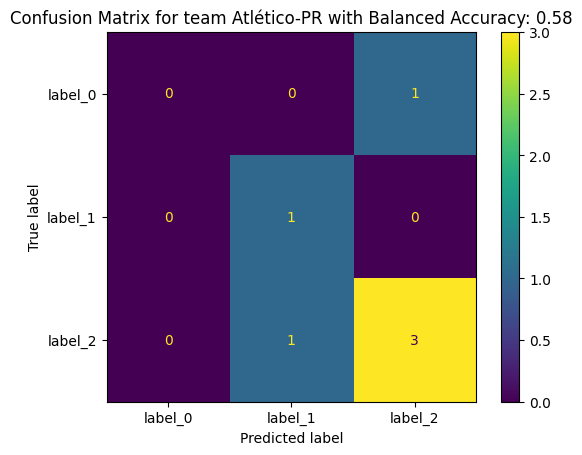

Processing team: Santos FC


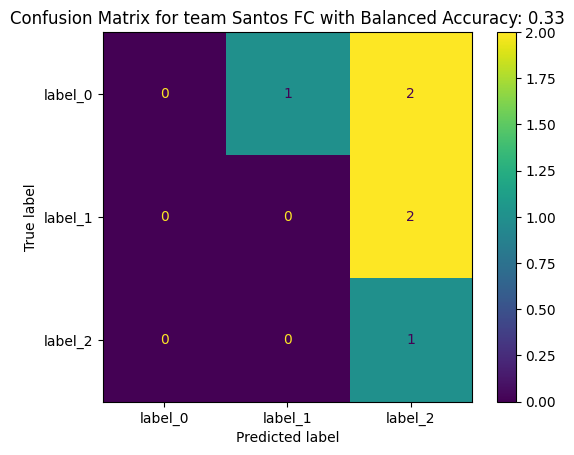

Processing team: Chapecoense


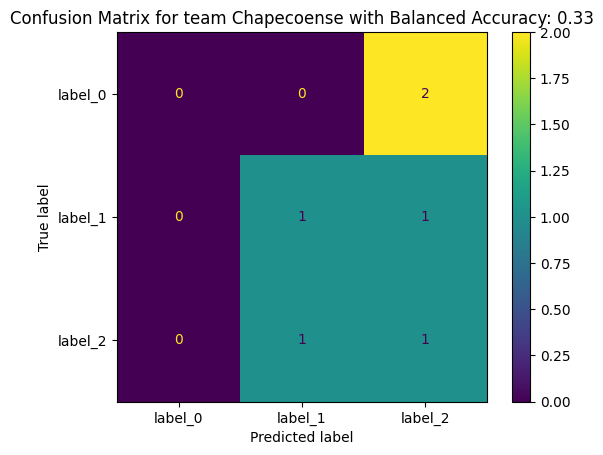

Processing team: Grêmio


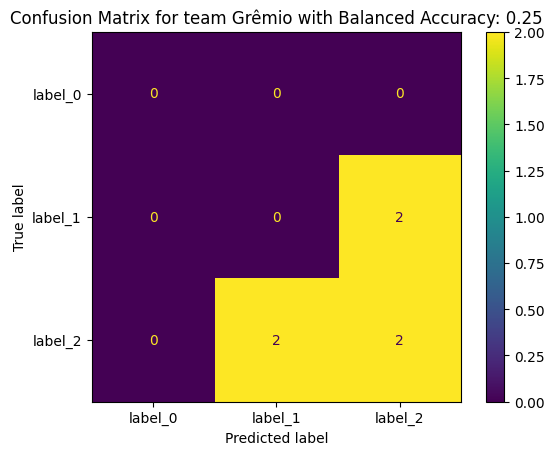

Processing team: São Paulo


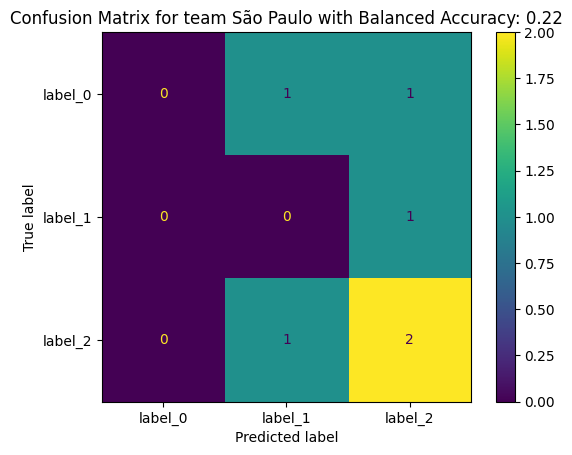

Processing team: EC Vitória


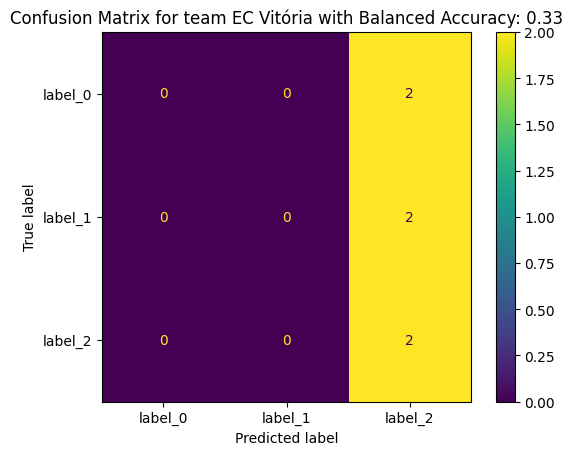

Processing team: Sport Recife


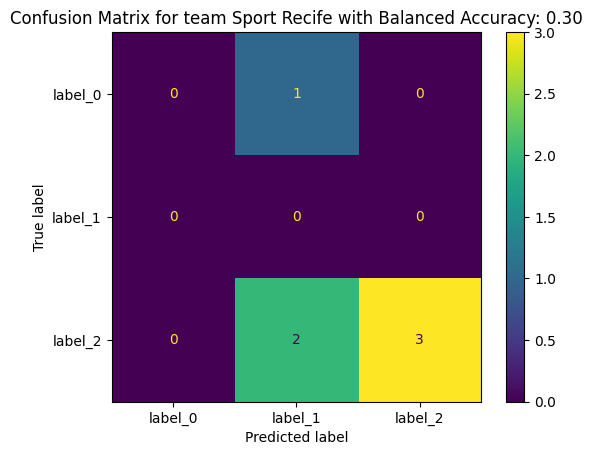

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Carrega o melhor modelo salvo durante o treinamento
model = MLP()
model.load_state_dict(torch.load("best_model.pth"))
model.eval()  # Coloca o modelo no modo de avaliação

# Itera sobre cada time
for team in all_teams:
    print(f"Processing team: {team}")

    # Obtém os dados do time
    team_train_df = team_dfs[team]
    team_test_df = team_dfs[team]

    # Normaliza os dados
    scaler = StandardScaler()
    scaler.fit(team_train_df[feature_columns])
    team_train_df[feature_columns] = scaler.transform(team_train_df[feature_columns])
    team_test_df[feature_columns] = scaler.transform(team_test_df[feature_columns])

    # Avalia o modelo
    all_predictions = []
    all_true_values = []
    for i in range(0, len(team_test_df), test_batch_size):
        if i + 10 < len(team_test_df):
            for j in range(i+10, min(i+test_batch_size, len(team_test_df))-window_size):

                # Seleciona uma janela de exemplos de teste
                test_batch = team_test_df.iloc[j:j+window_size]

                # Converte os exemplos para tensores do PyTorch
                test_features = torch.tensor(test_batch[feature_columns].values, dtype=torch.float)
                test_targets = torch.tensor(team_test_df[target_column].iloc[j + window_size], dtype=torch.long).unsqueeze(0)

                # Faz previsões com o modelo
                with torch.no_grad():
                    outputs = model(test_features)

                # Obtém as classes preditas
                _, predicted = torch.max(outputs.data, 1)

                # Adiciona as predições e os verdadeiros valores às listas correspondentes
                all_predictions.extend(predicted.numpy())
                all_true_values.extend(test_targets.numpy())

    # Calcula a acurácia balanceada
    balanced_accuracy = balanced_accuracy_score(all_true_values, all_predictions)

    # Calcula a matriz de confusão
    conf_matrix = confusion_matrix(y_true=all_true_values, y_pred=all_predictions, labels=[0, 1, 2])

    # Plota a matriz de confusão
    title = f"Confusion Matrix for team {team} with Balanced Accuracy: {balanced_accuracy:.2f}"
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['label_0', 'label_1', 'label_2'])
    disp.plot()
    plt.title(title)
    plt.show()


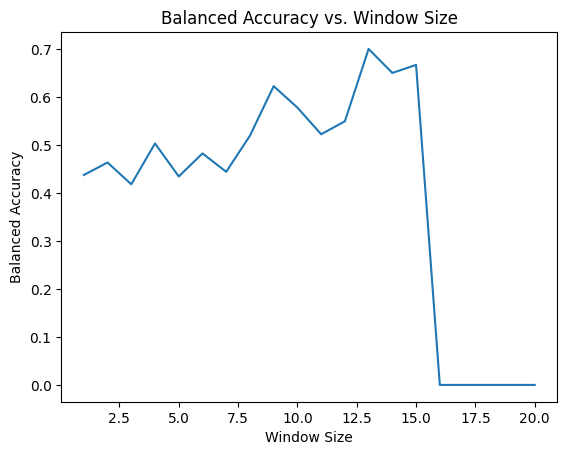

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Lista para armazenar acurácia balanceada para cada tamanho de janela
window_sizes = list(range(1, 21))  # Experimenta janelas de tamanho de 1 a 20
balanced_accuracies = []

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = x.reshape(-1, input_size)  # Redimensionando a entrada
        x = torch.tanh(self.fc1(x))
        x = self.dropout1(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

for window_size in window_sizes:
    input_size = len(feature_columns) * window_size
    model = MLP(input_size)
    # Define uma semente para garantir a reprodutibilidade do código
    randomseed = 42
    torch.manual_seed(randomseed);
    torch.cuda.manual_seed_all(randomseed);
    random.seed(randomseed);
    np.random.seed(randomseed)
    torch.backends.cudnn.deterministic=True


    # Cria um objeto StandardScaler para normalizar os dados
    scaler = StandardScaler()

    # Ajusta o normalizador aos dados de treinamento (calcula a média e o desvio padrão)
    scaler.fit(train_df1[feature_columns])

    # Usa o normalizador para transformar os dados de treinamento e validação
    train_df1[feature_columns] = scaler.transform(train_df1[feature_columns])
    test_df1[feature_columns] = scaler.transform(test_df1[feature_columns])

    # Define o número de épocas
    num_epochs = 100

    # Inicia a paciência para o Early Stopping
    patience = 0
    patience_limit = 100  # Define um limite para a paciência

    # Cria listas para armazenar as perdas de treinamento e validação
    train_losses = []
    val_losses = []

    # Inicializa a melhor acurácia balanceada
    best_bal_acc = 0

    # Inicializa a melhor perda de validação
    best_val_loss = float('inf')

    # Define o tamanho do lote de treinamento e teste
    train_batch_size = 32
    test_batch_size = 16

    # Inicia a paciência para o Early Stopping
    patience = 0
    patience_limit = 100  # Define um limite para a paciência

    # Cria listas para armazenar as perdas de treinamento e validação
    train_losses = []
    val_losses = []

    # Inicializa a melhor acurácia balanceada
    best_bal_acc = 0

    # Inicializa a melhor perda de validação
    best_val_loss = float('inf')

    # Define o tamanho do lote de treinamento e teste
    train_batch_size = 32
    test_batch_size = 16

    # Loop sobre o número de épocas
    for epoch in range(num_epochs):
        # Parte de treinamento
        running_train_loss = 0.0
        for i in range(0, len(train_df1), train_batch_size):  # Iterando sobre o conjunto de treinamento em lotes
            for j in range(i, min(i + train_batch_size, len(train_df1)) - window_size):  # Iterando sobre cada lote

                train_batch = train_df1.iloc[j:j+window_size]
                train_features = torch.tensor(train_batch[feature_columns].values.flatten(), dtype=torch.float)
                train_targets = torch.tensor(train_df1[target_column].iloc[j + window_size], dtype=torch.long).unsqueeze(0)

                # Obtém os outputs do modelo
                outputs = model(train_features)

                # Obtém as probabilidades aplicando softmax
                probs = torch.softmax(outputs, dim=1)

                # Calcula a entropia
                ent = entropy(probs)

                # Define um limite para a entropia
                entropy_threshold = 0.5

                # Seleciona apenas os outputs e targets onde a entropia é maior que o limite
                indices = torch.where(ent > entropy_threshold)
                high_entropy_outputs = outputs[indices]
                high_entropy_targets = train_targets[indices]

                # Zera os gradientes do otimizador
                optimizer.zero_grad()

                # Calcula a loss apenas para essas amostras
                loss = loss_function(high_entropy_outputs, high_entropy_targets)

                # Retropropagação do erro
                loss.backward()

                # Atualiza os parâmetros do modelo
                optimizer.step()

                # Adicione a perda atual ao running_train_loss
                running_train_loss += loss.item()

        # Adicione a perda média de treinamento à lista train_losses
        train_losses.append(running_train_loss / (len(train_df1) // 10))

        # Parte de teste
        all_predictions = []
        all_true_values = []
        running_val_loss = 0.0
        for i in range(0, len(test_df1), test_batch_size):  # Iterando sobre o conjunto de teste em lotes
            if i + test_batch_size < len(test_df1):  # Garantindo que não vamos além do tamanho do dataframe de teste
                for j in range(i + test_batch_size, min(i + 2 * test_batch_size, len(test_df1)) - window_size):  # Iterando sobre cada lote

                    test_batch = test_df1.iloc[j:j+window_size]
                    test_features = torch.tensor(test_batch[feature_columns].values.flatten(), dtype=torch.float)
                    test_targets = torch.tensor(test_df1[target_column].iloc[j + window_size], dtype=torch.long).unsqueeze(0)

                    with torch.no_grad():  # Não precisamos calcular gradientes durante a fase de teste
                        outputs = model(test_features)
                        loss = loss_function(outputs, test_targets)
                        _, predicted = torch.max(outputs.data, 1)

                    # Adicione a perda atual ao running_val_loss
                    running_val_loss += loss.item()

                    all_predictions.extend(predicted.numpy())
                    all_true_values.extend(test_targets.numpy())

        # Adicione a perda média de validação à lista val_losses
        val_loss = running_val_loss / len(test_df1)
        val_losses.append(val_loss)

        # Calcula a acurácia balanceada no conjunto de validação
        bal_acc = balanced_accuracy_score(all_true_values, all_predictions)

        # Verificando se a acurácia balanceada atual é a melhor
        if bal_acc > best_bal_acc:
            best_bal_acc = bal_acc
            # Salva o modelo com a maior acurácia balanceada
            torch.save(model.state_dict(), "best_model.pth")

        # Verificando se a perda de validação atual é a melhor
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # Reset a paciência
            patience += 0
        else:
            patience += 1

        # Interrompe o treinamento se a paciência for maior que o limite de paciência
        if patience >= patience_limit:
            print("Early stopping at window size: ", window_size, " and epoch: ", epoch)
            break

    # Guarda a melhor acurácia balanceada para este tamanho de janela
    balanced_accuracies.append(best_bal_acc)

# Plotar gráfico
plt.plot(window_sizes, balanced_accuracies)
plt.xlabel('Window Size')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs. Window Size')
plt.show()